# Predictive Analytics Project

In [76]:
#import packages
import numpy as np
import pandas as pd

# import sklearn packages
import sklearn
from sklearn.impute import SimpleImputer
import sys
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
import sklearn.metrics as metrics
from statsmodels.stats import proportion
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go


%matplotlib inline

ImportError: No module named plotly

In [77]:
#load data as dataframe
df = pd.read_csv('Melbourne_housing.csv')

## Data Cleaning from Task 2.1

In [78]:
df.shape

(34857, 21)

In [79]:
#Looking for any missing values in the data set and summing it up
bnull = df.isna().sum()
bnull

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [80]:
#Dropping duplicates row in the data frame
df.drop_duplicates(keep="first", inplace = True)

In [81]:
df.shape

(34856, 21)

In [82]:
#Using a dropper function to find out missing value percentage and droping data with more than 40% missing values
def dropper(dfd):
    i=0
    dfnew=pd.DataFrame()
    print("Columns with more that 40% missing values will be dropped")
    for x in range(dfd.shape[1]):
        per = np.round(float(dfd.isna().sum()[x])/dfd.shape[0],2)*100
        if (per < 40.0):
            dfnew[dfd.columns[x]] = dfd[dfd.columns[x]]
        else:
            print('Removed the Column : {} as the percentage of missing values is {}'.format(dfd.columns[x],per))
            i+=1
    if i==0:
        print("No need to remove any columns as all missing values are less that 40%")
    return dfnew

In [83]:
#Imputation would be performed either though mean or most frequent strategy
numerical_impute = SimpleImputer(strategy='mean')
categorical_impute = SimpleImputer(strategy='most_frequent')

In [84]:
#Here we would be checking the data if it does contain missing values it would be put into pipeline at a later stage
def checker(df):
    if(True in df.isna().any().values):
        print("Missing values exists! Data Cleaning and Imputation of missing values will be performed")
    else:
        print("No missing Values found!")
    return df

In [85]:
#Rounding the float values
def rounder(x):
    return np.round(x,1)

Here we would be doing imputation

The first step would be to divide the data into categories y,z,k where y would host missing values if any, z would host numerical and k would host objects Similarly if Z and K is not empty imputation functions defined above would be carried out a message would be printed saying Cleaning Complete

In [86]:
def imputer(df):
    dfd = df.copy()
    print("Imputation Started!")
    if(True in dfd.isna().any().values):
        y=[x for x in dfd.columns if dfd[x].isna().any()]
        z = [x for x in dfd[y].columns if (dfd[y][x].dtypes != 'object')]
        k = [x for x in dfd[y].columns if dfd[y][x].dtypes == 'object']
        print("In progress...")
        if len(z) != 0:
            dfd[z]= numerical_impute.fit_transform(dfd[z])
            dfd[z] = dfd[z].apply(rounder)
        if len(k) != 0:
            dfd[k]= categorical_impute.fit_transform(dfd[k])
        print("Cleaning complete")
    else:
        print("No missing values in the dataset")
    return dfd

In [87]:
#Performing Pipeline All the functions created above would be carried out in a pipeline hence the Pipeline

df1=df.pipe(dropper).pipe(checker).pipe(imputer)

Columns with more that 40% missing values will be dropped
Removed the Column : BuildingArea as the percentage of missing values is 61.0
Removed the Column : YearBuilt as the percentage of missing values is 55.0
Missing values exists! Data Cleaning and Imputation of missing values will be performed
Imputation Started!
In progress...
Cleaning complete


In [88]:
#To make sure data is cleaned we would print the sum of all missing values again
anull= df1.isna().sum()
anull

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [89]:
df1.shape

(34856, 19)

## Data exploration

In [90]:
#Create a copy of dataframe for exploration
data = df1.copy()
data.shape

(34856, 19)

In [91]:
# Descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34856,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34856,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34856,NaN,NaN,NaN,3.03101,0.969947,1,2,3,4,16
Type,34856,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,34856,NaN,NaN,NaN,1.05017e+06,567144,85000,695000,1.05017e+06,1.15e+06,1.12e+07
Method,34856,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34856,388,Jellis,3358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34856,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1848,6.78885,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


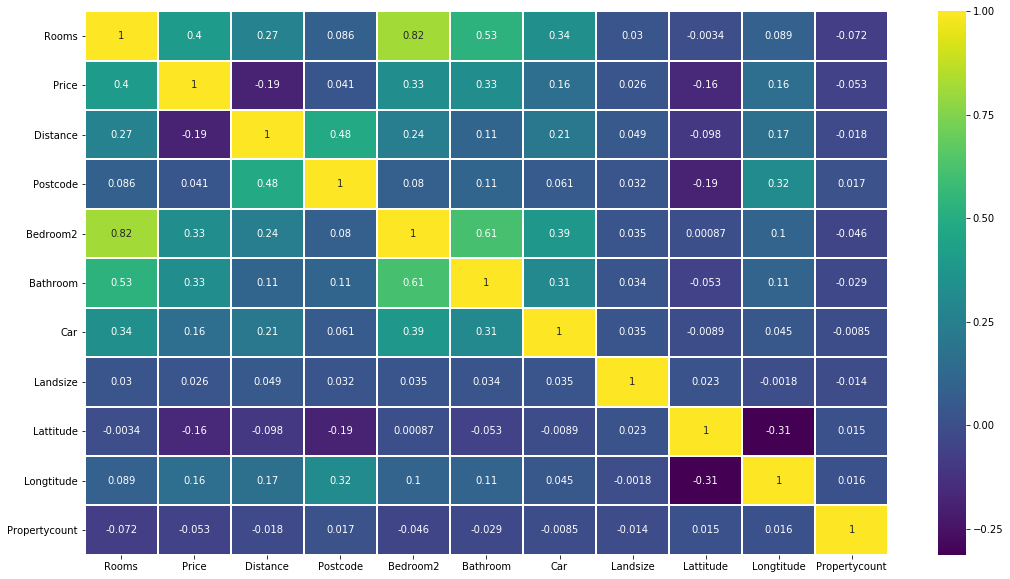

In [92]:
# Correlation between columns using a heatmap
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white',linewidths=1);

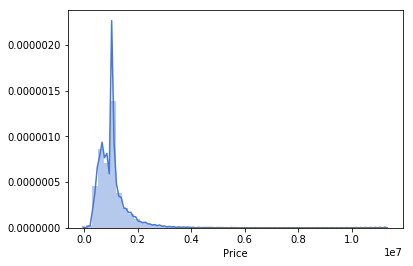

In [93]:
# price column
sns.set_palette("muted")
sns.distplot(data['Price'])

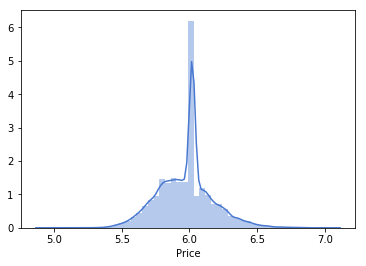

In [94]:
# Log transform the Price variable to approach a normal distribution
# reference: https://wguesdon.github.io/coding/project-5/

sns.set_palette("muted")
sns.distplot(np.log10(data["Price"]))

In [95]:
# Reference: https://www.kaggle.com/hariramgkrishnan/linear-regression-in-estimating-automobile-price
label = data["Regionname"].unique()
sizes = data["Regionname"].value_counts().values

# Pie chart: pull is given as a fraction of the pie radius. 
fig_pie1 = go.Figure(data=[go.Pie(labels=label, values=sizes, pull=[0.1, 0, 0, 0])])
# Defining the layout
fig_pie1.update_layout(title="Region Proportion",font=dict(size=15))
fig_pie1.show()

NameError: name 'go' is not defined

*Observation: The property count in southern metropolitan region is highest 34% and in western metropolitan region the property is 27.4%*

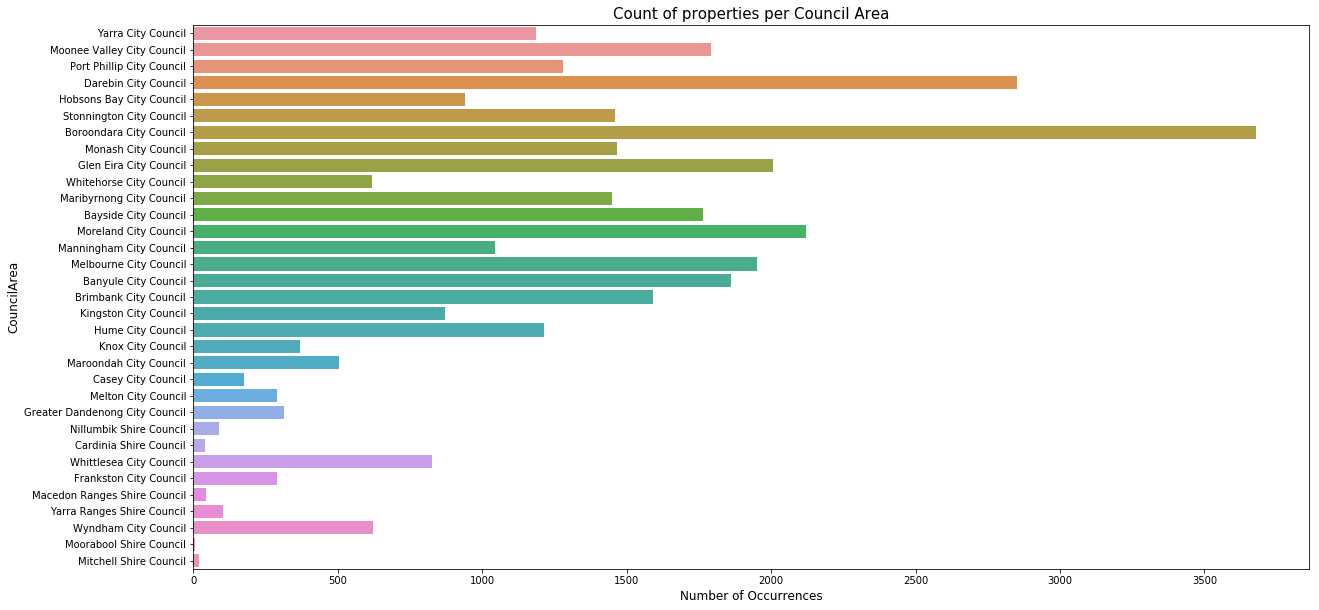

In [96]:
# reference: https://wguesdon.github.io/coding/project-5/
plt.figure(figsize=(20,10))
sns.countplot(y = data['CouncilArea'])
plt.title('Count of properties per Council Area',size=15)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('CouncilArea', fontsize=12)
plt.show()

*Observation: Most of the properties are from Boroondara city council*

Text(0,0.5,'Price')

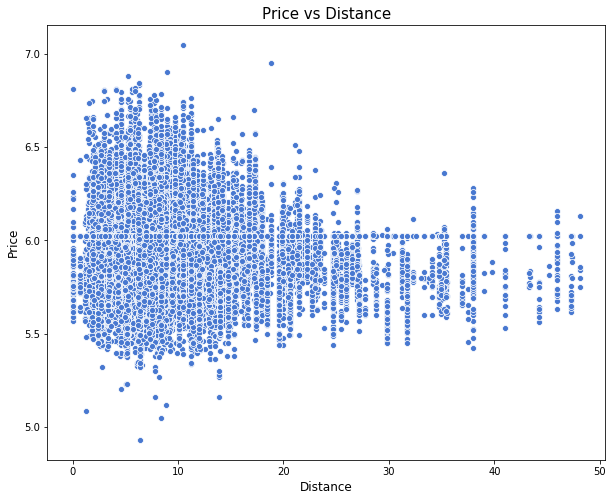

In [97]:
# reference: https://wguesdon.github.io/coding/project-5/
sns.set_palette("muted")
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="Distance", y=np.log10(data["Price"]), data=data)
plt.title('Price vs Distance',size=15)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Price', fontsize=12)

*Observation: The price is low if the distance high*

Text(0.5,6.8,'Number of Rooms')

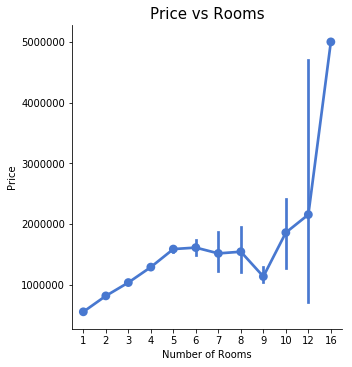

In [98]:
fig1 = sns.catplot(data=data,y='Price',x='Rooms',kind='point')
plt.title("Price vs Rooms",size=15)
plt.ylabel("Price", fontsize=10)
plt.xlabel("Number of Rooms", fontsize=10)

*Observation: Price increased if the number of rooms increases*

Text(0.5,0,'Price')

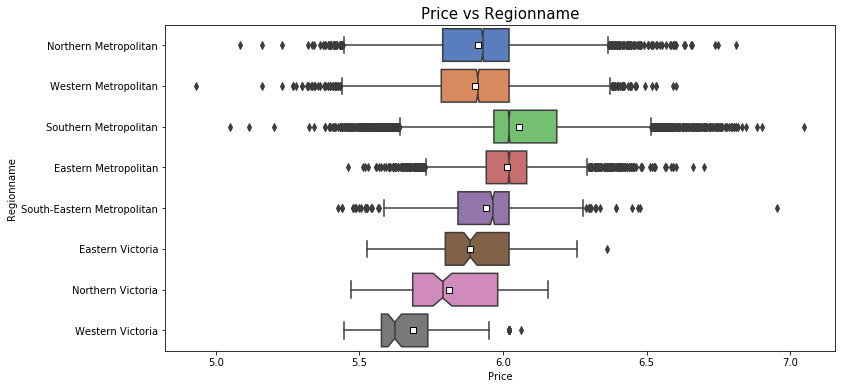

In [99]:
# Reference: https://wguesdon.github.io/coding/project-5/
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=np.log10(data["Price"]), y='Regionname', data=data, notch=True, 
            showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title("Price vs Regionname",size=15)
plt.ylabel("Regionname", fontsize=10)
plt.xlabel("Price", fontsize=10)

_Observation: The house prices in southern metropolitan region are higher and the hour price in western victoria are relatively low compare to other regions_

## Data preparation

Longtitude and Lattitude have no relation with price, drop columns

In [100]:
#Create a copy of dataframe for exploration
data = df1.copy()
data.shape

(34856, 19)

Since Longtitude and Lattitude have no relation with price, we remove those columns

In [101]:
del data["Lattitude"]
del data["Longtitude"]

Each Suburb has their own postcode, we remove postcode column 

In [102]:
data.drop(columns='Postcode', inplace=True)

Address have too many unique values and it won't be good for one-hot encode, we drop address column

In [103]:
data.drop(columns='Address', inplace=True)

In [104]:
data.drop(columns='SellerG', inplace=True)

In [105]:
data.drop(columns='CouncilArea', inplace=True)

For date, we only use the year because the price won't change within a year.

In [106]:
# function to get the year from date 
# reference: https://www.kaggle.com/tdh512194/linear-regression-for-price-with-onehotencode
import datetime
def to_year(date_str):
    return datetime.datetime.strptime(date_str.strip(),'%d/%m/%Y').year

In [107]:
data['Date'] = data.Date.apply(to_year)
data.Date.value_counts()

2017    19851
2016    10292
2018     4713
Name: Date, dtype: int64

In [108]:
data.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount
0,Abbotsford,2,h,1050173.3,SS,2016,2.5,2.0,1.0,1.0,126.0,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,2016,2.5,2.0,1.0,1.0,202.0,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2016,2.5,2.0,1.0,0.0,156.0,Northern Metropolitan,4019.0
3,Abbotsford,3,u,1050173.3,VB,2016,2.5,3.0,2.0,1.0,0.0,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2017,2.5,3.0,2.0,0.0,134.0,Northern Metropolitan,4019.0


In [109]:
data.shape

(34856, 13)

In [110]:
# select categoric columns
df_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Suburb' 'Type' 'Method' 'Regionname']


One Hot Encoding for categorical columns

In [111]:
# reference: https://wguesdon.github.io/coding/project-5/
data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

In [112]:
X = data.drop('Price', axis =1)
y = data['Price']

In [113]:
data.head()

,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Suburb_Aberfeldie,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1050173.3,2016,2.5,2.0,1.0,1.0,126.0,4019.0,0,...,1,0,0,0,1,0,0,0,0,0
1,2,1480000.0,2016,2.5,2.0,1.0,1.0,202.0,4019.0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2016,2.5,2.0,1.0,0.0,156.0,4019.0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1050173.3,2016,2.5,3.0,2.0,1.0,0.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2017,2.5,3.0,2.0,0.0,134.0,4019.0,0,...,0,0,0,0,1,0,0,0,0,0


## Data sampling - 70% training set and 30% testing set 

In [114]:
# Split the data into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [115]:
# Check shapes - 34856 * 0.7 = 24,399.2
print(X_train.shape, y_train.shape)

((24399, 375), (24399,))


In [116]:
# Check shapes - 34856 * 0.3 = 10,456.8
print(X_test.shape, y_test.shape)

((10457, 375), (10457,))


## Model development and design

***Linear regression model using sklearn***

In [117]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
# training the algorithm
lr_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
# predict target
y_pred = lr_model.predict(X_test)

## Model evaluation

In [119]:
#training set model score
lr_model.score(X_train,y_train)

0.4800268794469683

In [120]:
#test set model score
lr_model.score(X_test, y_test)

-22251273871.014317

In [121]:
#training set
predict_train = lr_model.predict(X_train.values)
mean_squared_error(y_train, predict_train)

169771685943.31305

In [122]:
#test set
predict_test = lr_model.predict(X_test.values)
mean_squared_error(y_test, predict_test)

6.903522100466674e+21

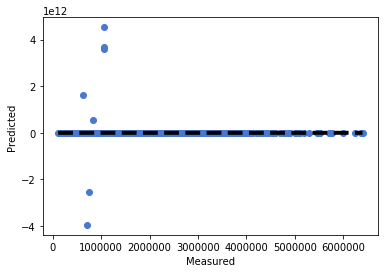

In [123]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

####  Report of results for the Linear Regression Method

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('MAE:', 1962429437.1865673)
('MSE:', 6.903522100466674e+21)
('RMSE:', 83087436477.88559)


***Support Vector regression model***

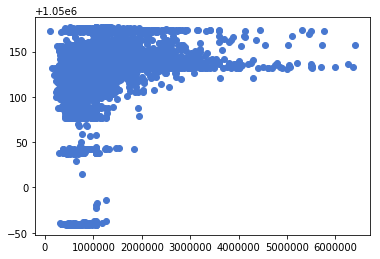

In [124]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')

svr_model.fit(X_train,y_train)

SVRpredictions = svr_model.predict(X_test)

plt.scatter(y_test,SVRpredictions)

####  Report of results for the Support Vector Regression

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, SVRpredictions))
print('MSE:', metrics.mean_squared_error(y_test, SVRpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, SVRpredictions)))

('MAE:', 348812.46509329847)
('MSE:', 310282691403.7215)
('RMSE:', 557030.2428088816)


***Ridge regression model***

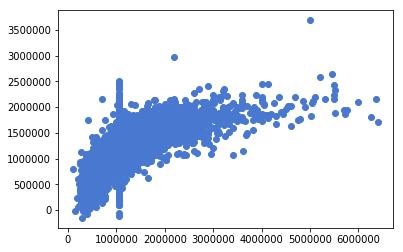

In [136]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
RigRegpredictions = ridge.predict(X_test)

plt.scatter(y_test,RigRegpredictions)

####  Report of results for the Ridge Regression Method

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, RigRegpredictions))
print('MSE:', metrics.mean_squared_error(y_test, RigRegpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RigRegpredictions)))

('MAE:', 258790.60177556268)
('MSE:', 160270161187.6672)
('RMSE:', 400337.5590519421)


#### Based on the results, the best model based on Mean Absolute Error, Mean Squared Error and Root Mean Squared Error is : 

### Ridge Regression Model